In [44]:
import glob
import pandas as pd 
import sklearn.model_selection
import os
import numpy as np
import matplotlib.pyplot as plt


In [5]:
list_training_isic2018 = glob.glob('../../../data/isic/isic2018/ISIC2018_Task1-2_Training_Input/*')
list_training_isic2018 = [img.split('/')[-1].split('.')[0] for img in list_training_isic2018 ]

In [11]:
isic2019 = pd.read_csv('../../../data/isic/isic2019/ISIC_2019_Training_GroundTruth.csv')
isic2019.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# not in common 
#isic2020 = pd.read_csv('../../../data/isic/isic2020/ISIC_2020_Training_GroundTruth.csv')
#isic2020[isic2020['image_name'].isin(list_training_isic2018)]

In [14]:
'ISIC 2018: {}, ISIC 2019: {}'.format(len(list_training_isic2018), isic2019.shape[0])

'ISIC 2018: 2596, ISIC 2019: 25331'

In [20]:
isic2018_9 = isic2019[isic2019['image'].isin(list_training_isic2018)]
print(isic2018_9.shape)
isic2018_9.head()

(772, 10)


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
isic2019_meta = pd.read_csv('../../../data/isic/isic2019/ISIC_2019_Training_Metadata.csv')
isic2019_meta.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


### Exploration of the data

In [33]:
isic2018_9[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].sum()

MEL     164.0
NV      608.0
BCC       0.0
AK        0.0
BKL       0.0
DF        0.0
VASC      0.0
SCC       0.0
UNK       0.0
dtype: float64

In [61]:
melanoma_imgs = isic2018_9[isic2018_9['MEL'] == 1]
else_nv = isic2018_9[isic2018_9['NV'] == 1]

In [36]:
melanoma_imgs

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,ISIC_0000013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,ISIC_0000074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,ISIC_0000157,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,ISIC_0000159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1217,ISIC_0011366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1221,ISIC_0011374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1228,ISIC_0011387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1229,ISIC_0011390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
def plt_images(list_images, data_path, quantidade_imagens=6):
    
    if quantidade_imagens == 0:
        quantidade_imagens = len(list_images)
    else:
        list_images = list_images[:quantidade_imagens]


    # Calcular o número de linhas e colunas com base na quantidade de imagens
    num_linhas = int(np.ceil(np.sqrt(quantidade_imagens)))
    num_colunas = int(np.ceil(quantidade_imagens / num_linhas))

    # Criar uma grade de subplots
    fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20,12))

    # Exemplo de caminho para as imagens (substitua pelos seus caminhos reais)
    caminhos_imagens = [os.path.join(data_path, i + '.jpg') for i in list_images]

    # Adicionar cada imagem ao subplot correspondente
    for i in range(quantidade_imagens):
        img = plt.imread(caminhos_imagens[i])  # Leia a imagem (substitua pela sua lógica de leitura)
        axs[i // num_colunas, i % num_colunas].imshow(img)
        axs[i // num_colunas, i % num_colunas].axis('off')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

In [70]:
dataset_path = '../../../data/isic/isic2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'

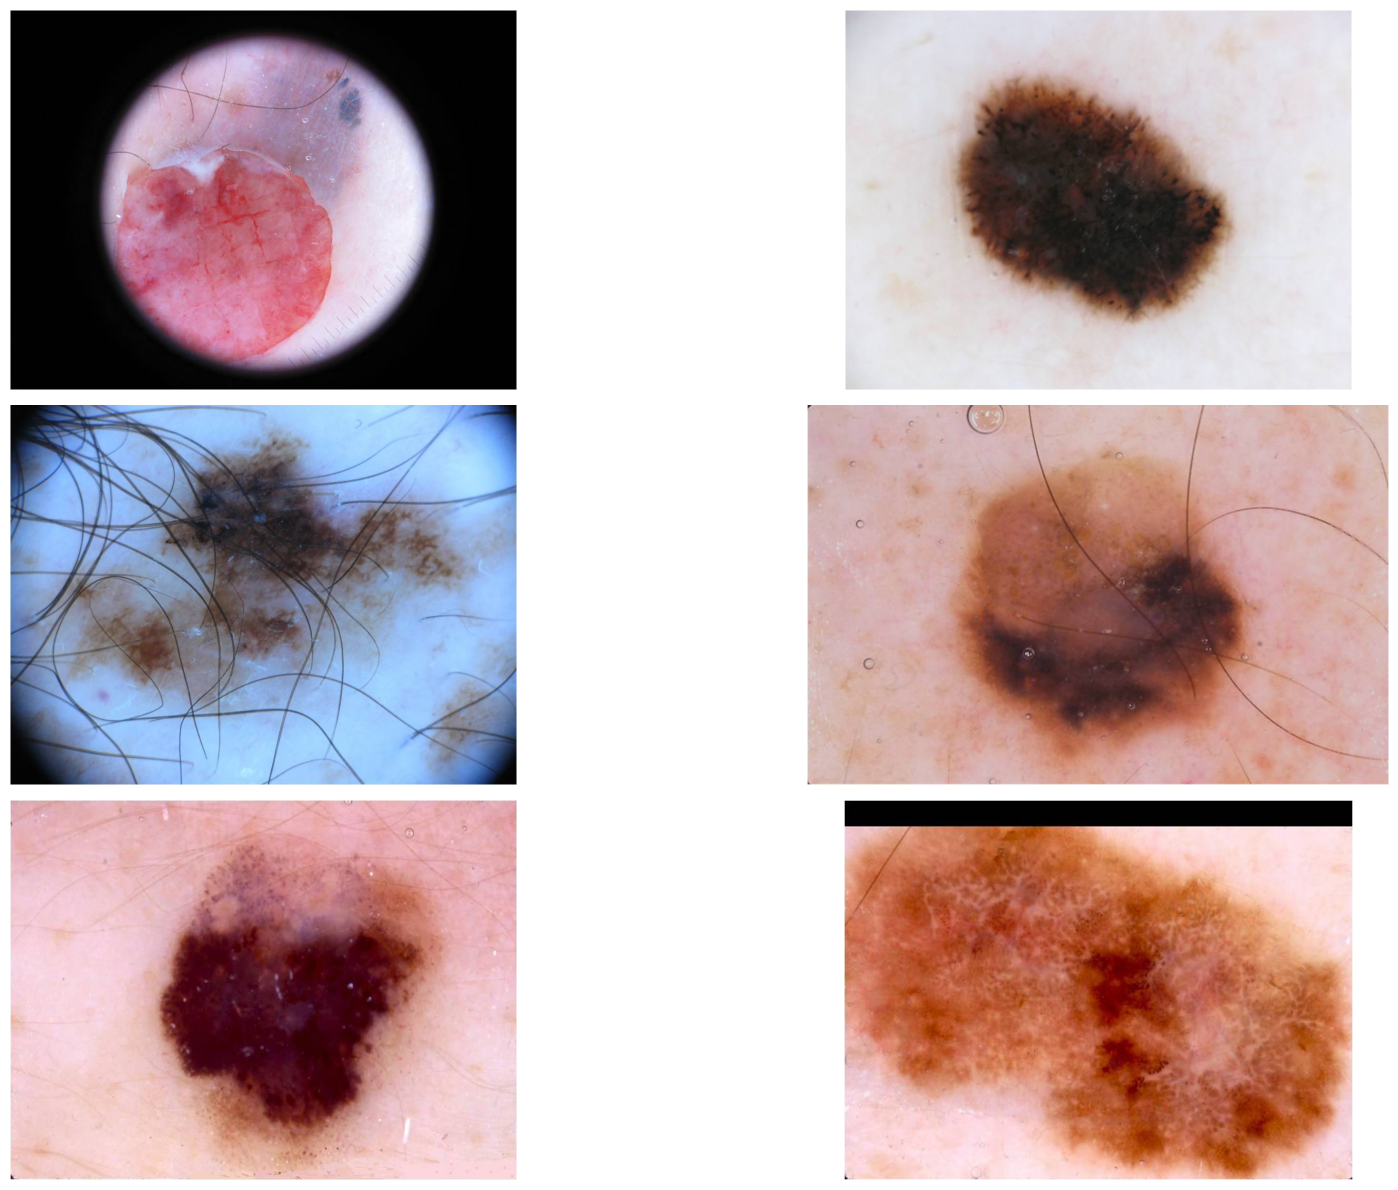

In [71]:
plt_images(melanoma_imgs['image'].tolist(), dataset_path)

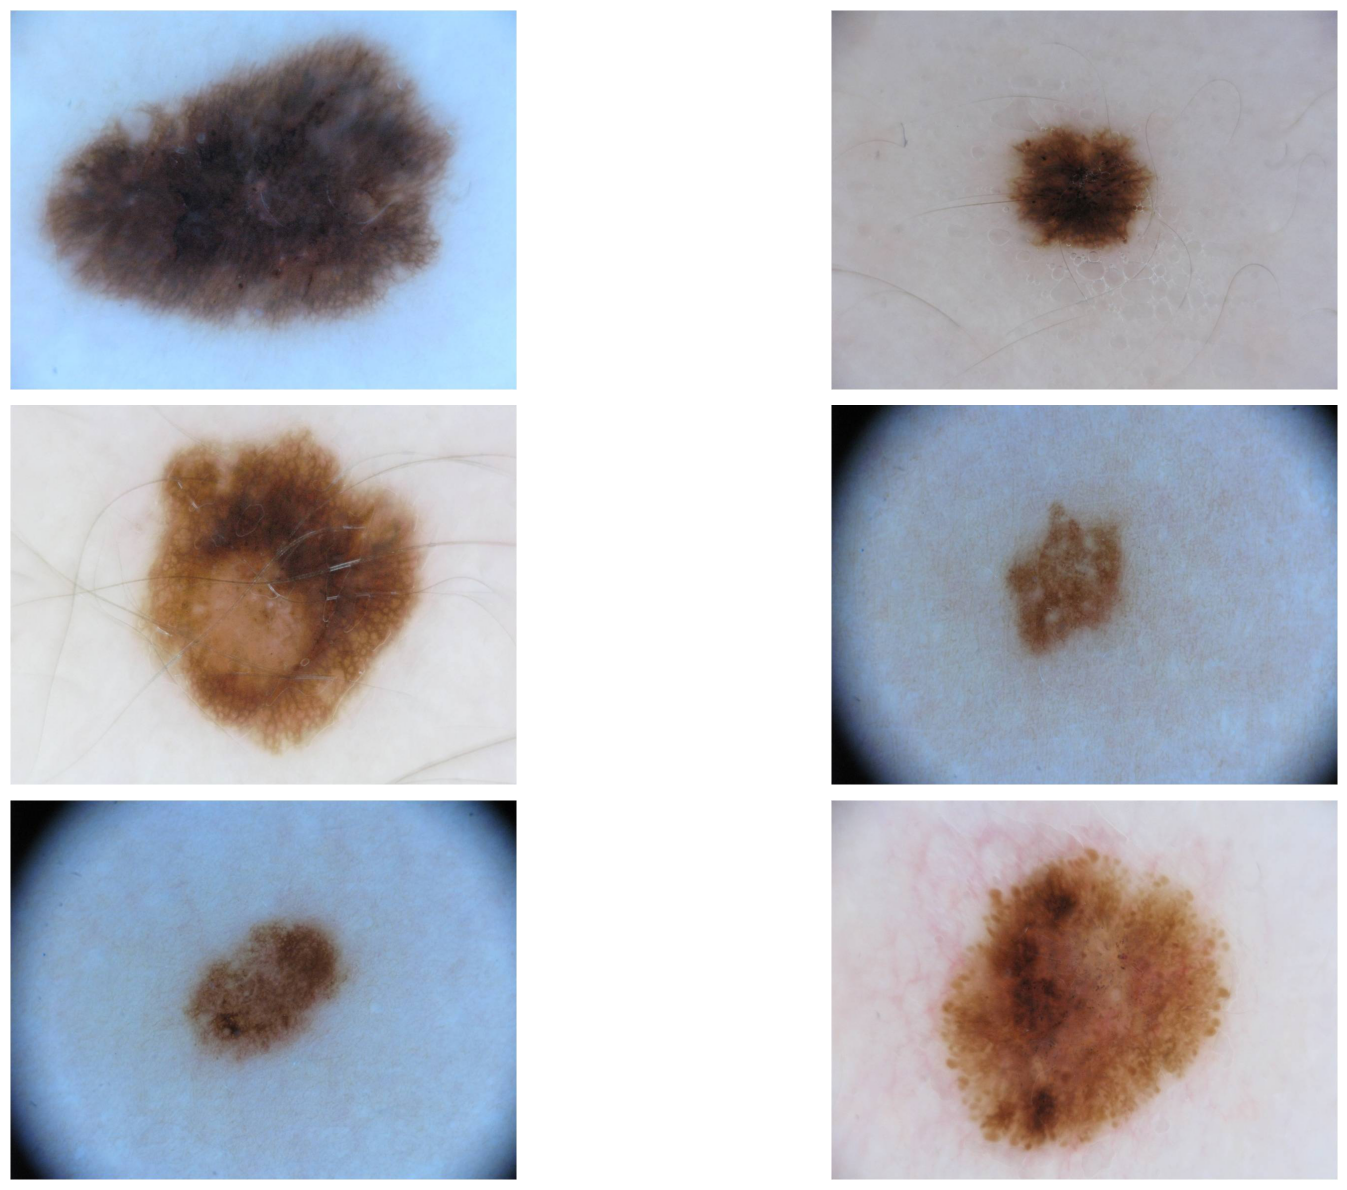

In [72]:
plt_images(else_nv['image'].tolist(), dataset_path)

### Train, Validation and Test sets

I was considering to use 70% of the data for training, 10% for validation and 20% for testing.
But as the tests sets with segmentation ground truth are scarce, I only have 772 images, so I'll use all of them to test.

In [84]:
'Training: ' + str(round(isic2019.shape[0] * 0.8)), 'Validation: ' + str(round(isic2019.shape[0] * 0.17)), 'Testing: ' + str(round(isic2019.shape[0] * 0.03))

('Training: 20265', 'Validation: 4306', 'Testing: 760')

In [13]:
round(isic2019.shape[0] * 0.7) + round(isic2019.shape[0] * 0.1) + round(isic2019.shape[0] * 0.2)

25331